In [44]:
import pandas as pd
import os
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")

In [45]:
# loading videos for 2017/2018 and 2020/2022 seperately

path = r'\all_videos_preprocess'  # change if you ran it on your personal environment

all_videos = os.listdir(path)
data17_18 = pd.DataFrame()
data20_22 = pd.DataFrame()
for video in all_videos :  
    channel = str("\\") + video
    data = pd.read_csv(path+channel)
    if 'data17_18' in video :
        data17_18 = data17_18.append(data)
    else:
        data20_22 = data20_22.append(data)
data17_18.reset_index(inplace=True, drop=True)
data20_22.reset_index(inplace=True, drop=True)

In [46]:
# Mapping YouTube Video Categories

YouTubeVideoCategories = {1:'Film & Animation', 2:'Autos & Vehicles', 10:'Music', 15:'Pets & Animals', 17:'Sports',
                          19:'Travel & Events', 20:'Gaming', 22:'People & Blogs',23:'Comedy', 24:'Entertainment',
                          25:'News & Politics', 26:'Howto & Style', 27:'Education', 28:'Science & Technology',
                          29:'Nonprofits & Activism'}

data17_18['Category'] = data17_18['Category'].apply(lambda x : YouTubeVideoCategories[x])
data20_22['Category'] = data20_22['Category'].apply(lambda x : YouTubeVideoCategories[x])

In [47]:
data20_22

,Title,Description,Channel Title,Publish time,Tags,Category,Duration,Number of comments,Number of likes,Number of views,Number of favorites,Video quality,Licensed,trending times,trending for
0,On dévoile nos pires secrets,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-05-11 16:26:33+00:00,"['squeezie seb', 'squeezie concept', 'squeezie...",Entertainment,NaN,4327,379085,4264674,0,hd,1.0,6.0,5 days 00:00:00
1,ok cette fois ils m'ont eu,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-05-04 15:23:58+00:00,[],Entertainment,11:8,6020,426035,4632592,0,hd,1.0,6.0,5 days 00:00:00
2,On a fait le plus grand où est Charlie du mond...,Merci à NordVPN d'avoir soutenu ce projet ! Té...,SQUEEZIE,2022-04-27 16:50:40+00:00,"['squeezie où est charlie', 'squeezie concept'...",Entertainment,34:22,11865,621557,6876806,0,hd,1.0,7.0,6 days 00:00:00
3,n'allez jamais seul dans une forêt...,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-04-23 17:15:05+00:00,[],Entertainment,19:23,8568,423748,5381583,0,hd,1.0,6.0,5 days 00:00:00
4,ne réservez pas une chambre dans cet hôtel (Th...,Thread horreur IRL 2 ! Je rappelle le concept ...,SQUEEZIE,2022-04-14 16:00:20+00:00,[],Entertainment,47:53,11337,463772,7316018,0,hd,1.0,8.0,7 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,We are in the car song | Nursery rhymes and so...,This Kids Song about travel by the car and we ...,les boys tv2,2020-10-09 10:00:10+00:00,[],Film & Animation,3:1,-1,-1,448624,0,hd,1.0,0.0,0.0
10994,Sami and Adel play with dad at the Amusement P...,NaN,les boys tv2,2020-10-07 10:32:35+00:00,"['park for children', 'playground', 'family fu...",Film & Animation,2:15,-1,-1,508123,0,hd,1.0,0.0,0.0
10995,Amira and sami play with color balloon,NaN,les boys tv2,2020-10-04 08:00:03+00:00,"['expirment', 'car']",Film & Animation,1:27,-1,-1,514323,0,hd,1.0,0.0,0.0
10996,sami Play with Princess Carriage Inflatable Toy,NaN,les boys tv2,2020-10-02 08:00:10+00:00,[],Film & Animation,12:23,-1,-1,430261,0,hd,1.0,0.0,0.0


## Title's effect

<AxesSubplot:title={'center':'Title length and trending times in 2020/2022'}, xlabel='Title', ylabel='trending times'>

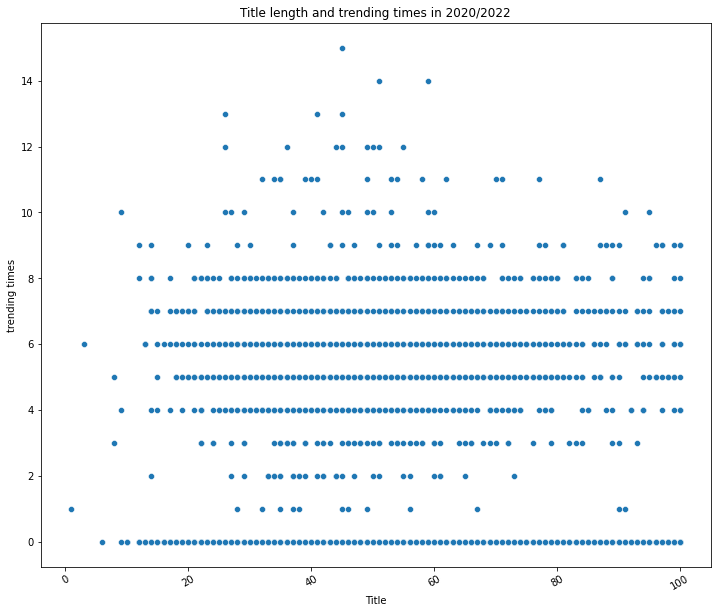

In [48]:
# title length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Title length and trending times in 2020/2022')
title_length = data20_22['Title'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data20_22, x=title_length, y='trending times')

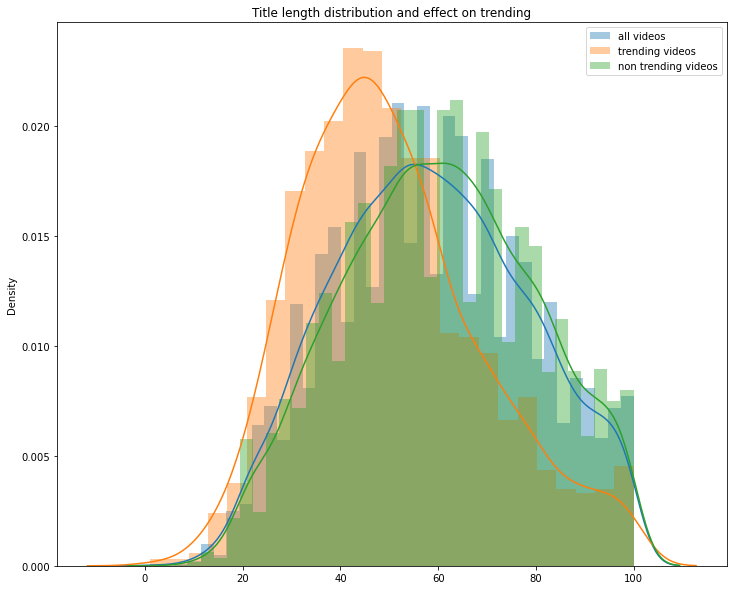

In [49]:
# Title length distribution and effect on trending
figure = plt.figure(figsize=(12,10))
sns.distplot(x=title_length, label='all videos')
sns.distplot(x=title_length[data20_22['trending times']>0], label='trending videos')
sns.distplot(x=title_length[data20_22['trending times']==0], label='non trending videos')

plt.title('Title length distribution and effect on trending')
plt.legend()

In [50]:
# percentage of trending videos' titles with 25 and 55 character length
title_length_trending = title_length[data20_22['trending times']>0]
title_length_trending[(title_length_trending > 25)*(title_length_trending < 55)].count() / title_length_trending.count() * 100

57.23684210526315

In [51]:
# percentage of non trending videos' titles with 25 and 55 character length
title_length_non_trending = title_length[data20_22['trending times']==0]
title_length_non_trending[(title_length_non_trending > 25)*(title_length_non_trending < 55)].count() / title_length_non_trending.count() * 100

36.199871327471584

text length between 30 and 70 characters ( moyenne entre 40-60)

<AxesSubplot:title={'center':'Barplot of the trending times in function of the number of uppercased words in the title'}, xlabel='Title', ylabel='trending times'>

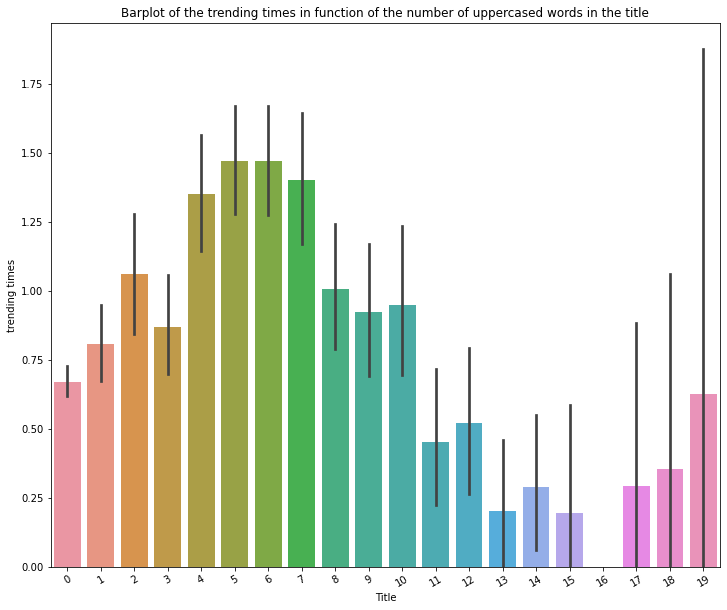

In [52]:
#Titles with fully uppercased words 
title_words = data20_22['Title'].apply(lambda x : str(x).split(' '))

figure = plt.figure(figsize=(12,10))
#colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Barplot of the trending times in function of the number of uppercased words in the title')

nb_up_title = title_words.apply( lambda x : np.sum([j.isupper() for j in x]))
sns.barplot(data=data20_22, x=nb_up_title, y='trending times' )

In [53]:
# percentage of trending videos' titles with 0 and 8 uppercase words
nb_up_title_trending = nb_up_title[data20_22['trending times']>0]
nb_up_title_trending[(nb_up_title_trending > 0)*(nb_up_title_trending < 8)].count() / nb_up_title_trending.count() * 100

53.88755980861244

In [54]:
# percentage of trending videos' titles with uppercase words
nb_up_title_trending[(nb_up_title_trending > 0)].count() / nb_up_title_trending.count() * 100

66.20813397129187

In [55]:
# percentage of non trending videos' titles with 0 and 8 uppercase words
nb_up_title_non_trending = nb_up_title[data20_22['trending times']==0]
nb_up_title_non_trending[(nb_up_title_non_trending > 0)*(nb_up_title_non_trending < 8)].count() / nb_up_title_non_trending.count() * 100

36.91829294445636

<AxesSubplot:title={'center':'Number of uppercased words in the title in function of being trending/not trending '}, xlabel='Title', ylabel='count'>

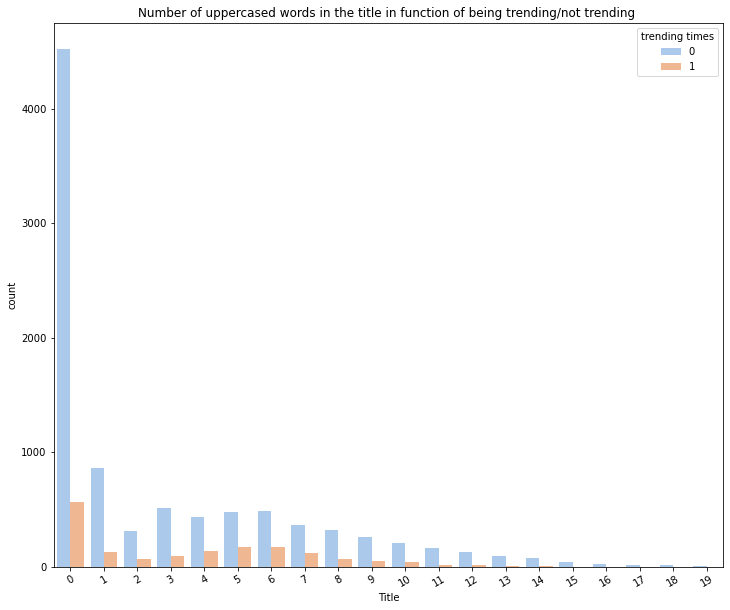

In [56]:
# Number of uppercased words in the title in function of being trending/not trending
figure = plt.figure(figsize=(12,10))
plt.xticks(rotation=30)
plt.title('Number of uppercased words in the title in function of being trending/not trending ')

nb_up_title = title_words.apply( lambda x : np.sum([j.isupper() for j in x]))
sns.countplot(x=nb_up_title, hue=(data20_22['trending times']>0).apply(lambda x :int(x)) , data=data20_22, palette=colors)

In [57]:
# all words of trending videos
title_words = title_words[data20_22['trending times']>0]

In [58]:
# all words and all uppercased words without stop words
from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('english') + stopwords.words('french')

all_words = title_words.sum()
upper_words = (title_words.apply(lambda x : [j for j in x if j.isupper()])).sum()

all_words_tok = pd.Series([word for word in all_words if not word.lower() in final_stopwords_list])
upper_words_tok = pd.Series([word for word in upper_words if not word.lower() in final_stopwords_list])

In [59]:
# word frequency in titles

print('Frequent words and symbols :')
all_words_tok.value_counts()[:20]
#upper_words_tok.value_counts()[:20]

Frequent words and symbols :


!            538
-            312
(Clip         85
:             74
?             72
Officiel)     64
PIRES         47
ft.           44
J'AI          42
ça            42
2             38
!!            38
plus          37
officiel)     36
fait          35
&             32
...           32
(et           31
VS            31
trop          31
dtype: int64

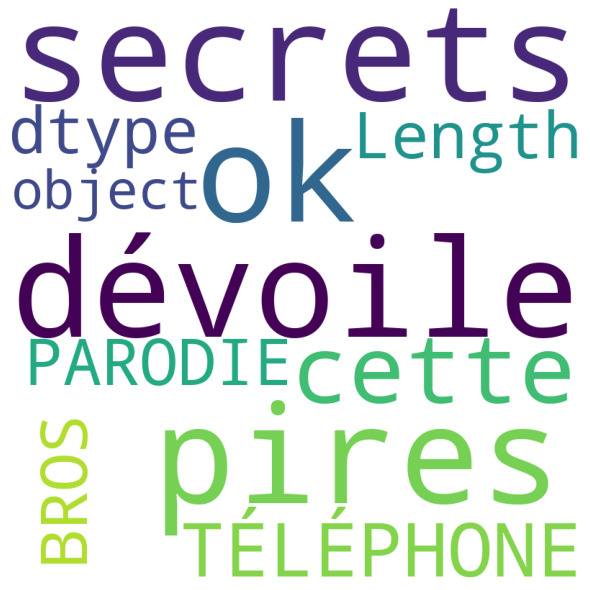

In [60]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(all_words_tok) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [61]:
# uppercase word frequency in titles

print('Frequent uppercase words :')
upper_words_tok.value_counts()[:20]

Frequent uppercase words :


PIRES        47
J'AI         42
VS           31
ÇA           30
FAIT         28
BROS         25
GIMS         24
PARODIE      23
QUAND        22
TOUT         21
PLUS         20
CACHE        20
PIRE         20
COMMENT      19
J’AI         19
DADJU        19
TESTE        18
24H          18
CHALLENGE    18
VOITURE      17
dtype: int64

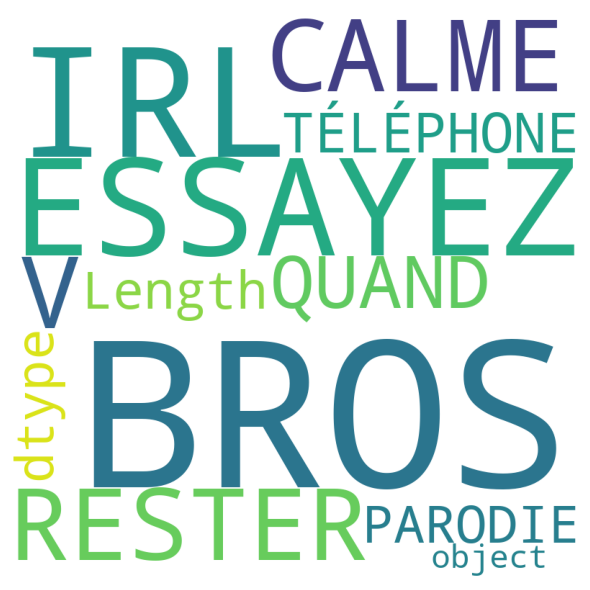

In [62]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(upper_words_tok) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


## Tags' effect

<AxesSubplot:title={'center':'Number of tags and trending times in 2020/2022'}, xlabel='Tags', ylabel='trending times'>

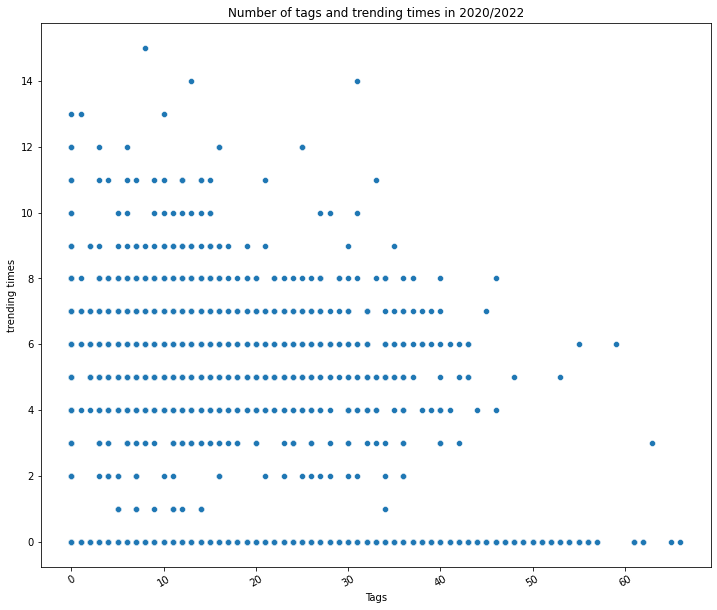

In [63]:
# number of tags and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Number of tags and trending times in 2020/2022')
tag_nb = data20_22['Tags'].apply(lambda x : len(literal_eval(str(x))))
sns.scatterplot(data=data20_22, x=tag_nb, y='trending times')

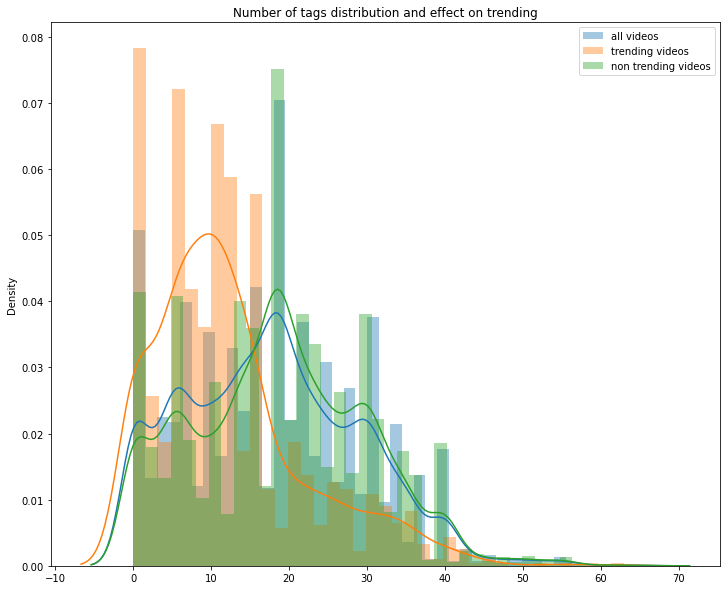

In [64]:
# Number of tags distribution and effect on trending
figure = plt.figure(figsize=(12,10))
sns.distplot(x=tag_nb, label='all videos')
sns.distplot(x=tag_nb[data20_22['trending times']>0], label='trending videos')
sns.distplot(x=tag_nb[data20_22['trending times']==0], label='non trending videos')

plt.title('Number of tags distribution and effect on trending')
plt.legend()

In [65]:
# percentage of trending videos with 0 and 13 tags
tag_nb_trending = tag_nb[data20_22['trending times']>0]
tag_nb_trending[(tag_nb_trending >= 0)*(tag_nb_trending < 13)].count() / tag_nb_trending.count() * 100

61.36363636363637

In [66]:
# percentage of non trending videos with 0 and 13 tags
tag_nb_non_trending = tag_nb[data20_22['trending times']==0]
tag_nb_non_trending[(tag_nb_non_trending >= 0)*(tag_nb_non_trending < 13)].count() / tag_nb_non_trending.count() * 100

28.69397383658589

<AxesSubplot:title={'center':'Length of tags and trending times in 2020/2022'}, xlabel='Tags', ylabel='trending times'>

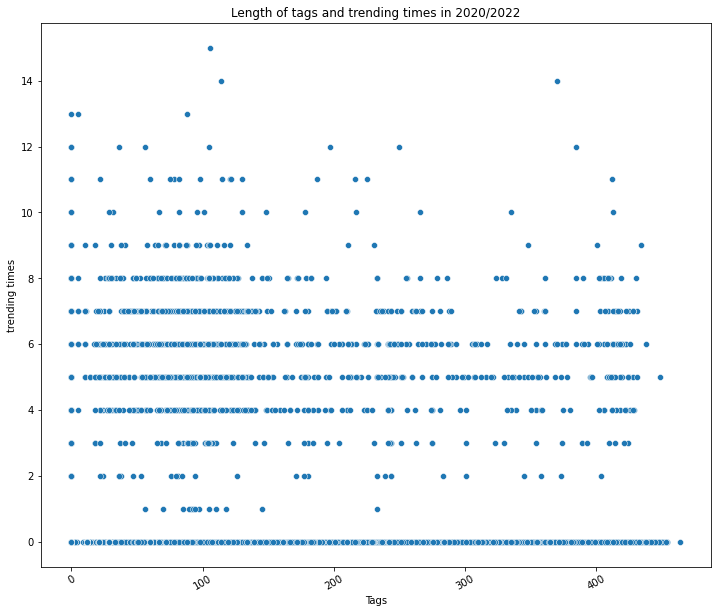

In [67]:
# tags' length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Length of tags and trending times in 2020/2022')
tag_length = data20_22['Tags'].apply(lambda x : len(str("". join(literal_eval(str(x))))))
sns.scatterplot(data=data20_22, x=tag_length, y='trending times')

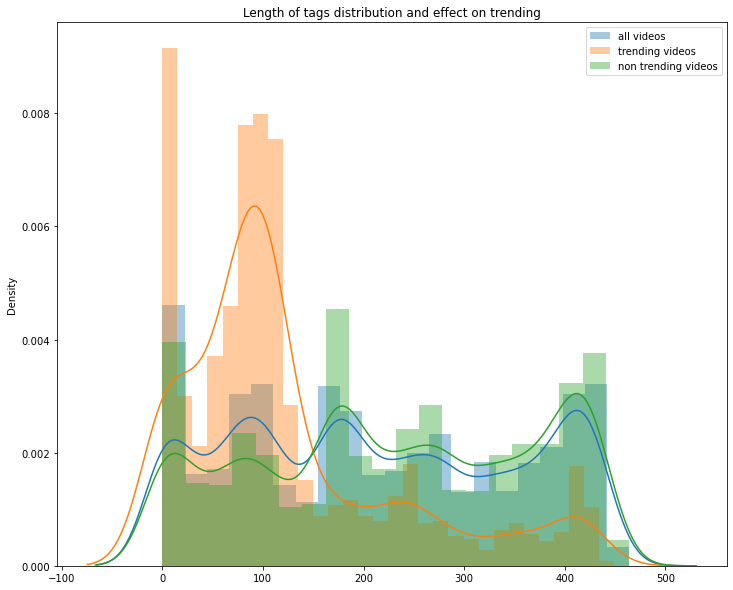

In [68]:
# Length of tags distribution and effect on trending
figure = plt.figure(figsize=(12,10))
sns.distplot(x=tag_length, label='all videos')
sns.distplot(x=tag_length[data20_22['trending times']>0], label='trending videos')
sns.distplot(x=tag_length[data20_22['trending times']==0], label='non trending videos')

plt.title('Length of tags distribution and effect on trending')
plt.legend()

In [69]:
# percentage of trending videos' tags with 20 and 150 characters
tag_length_trending = tag_length[data20_22['trending times']>0]
tag_length_trending[(tag_length_trending >= 20)*(tag_length_trending < 150)].count() / tag_length_trending.count() * 100

60.76555023923444

In [70]:
# percentage of trending videos with tags
tag_nb_trending[(tag_nb_trending >0)].count() / tag_nb_trending.count() * 100

87.5

In [71]:
# percentage of non trending videos' tags with 20 and 150 characters
tag_length_non_trending = tag_length[data20_22['trending times']==0]
tag_length_non_trending[(tag_length_non_trending >= 20)*(tag_length_non_trending < 150)].count() / tag_length_non_trending.count() * 100

21.005790263778685

In [72]:
tag_words = pd.Series((data20_22['Tags'].apply(lambda x : literal_eval(str(x)))).sum())

In [73]:
# word frequency in tags

print('Frequent tags words :')
tag_words.value_counts()[:20]

Frequent tags words :


sympa                 1517
brightside french     1451
brightside france     1442
bright side france    1422
bright side french    1417
bricolage              856
astuces                829
football               827
choses utiles          818
technique              804
projets faciles        803
artisanat              765
travaux manuels        750
tuto                   749
art                    745
PSG                    744
paris                  737
Neymar                 735
tutorial               733
trucs                  733
dtype: int64

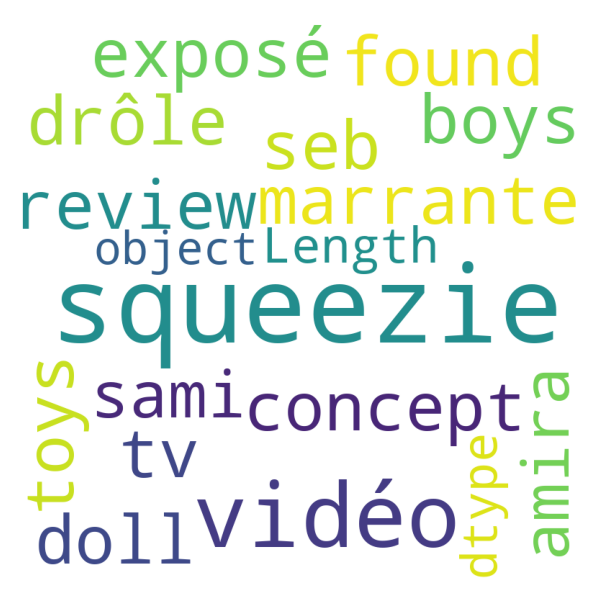

In [74]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(tag_words) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [75]:
# tag words in trending videos 
tag_words_trend = pd.Series((data20_22[data20_22['trending times']>0]['Tags'].apply(lambda x : literal_eval(str(x)))).sum())

In [76]:
# word frequency in tags of trending videos

print('Frequent tags words of trending videos :')
tag_words_trend.value_counts()[:20]

Frequent tags words of trending videos :


michou              180
humour              168
video               135
amixem              123
fun                 122
reaction            116
parodie             115
delire              114
comedie             101
redbox               92
drole                92
musique              92
Joyca                90
Français             90
diy                  89
inoxtag              84
squeezie best of     79
vidéo                79
funny                78
Humour               78
dtype: int64

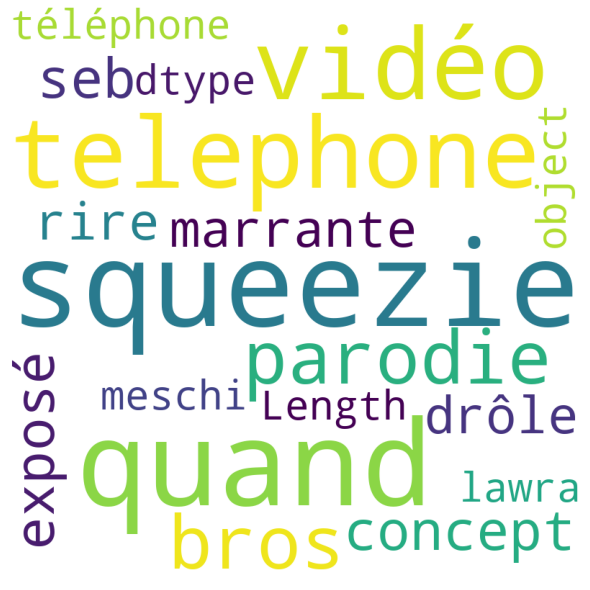

In [77]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(tag_words_trend) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


## Description effect

<AxesSubplot:title={'center':'Description length and trending times in 2020/2022'}, xlabel='Description', ylabel='trending times'>

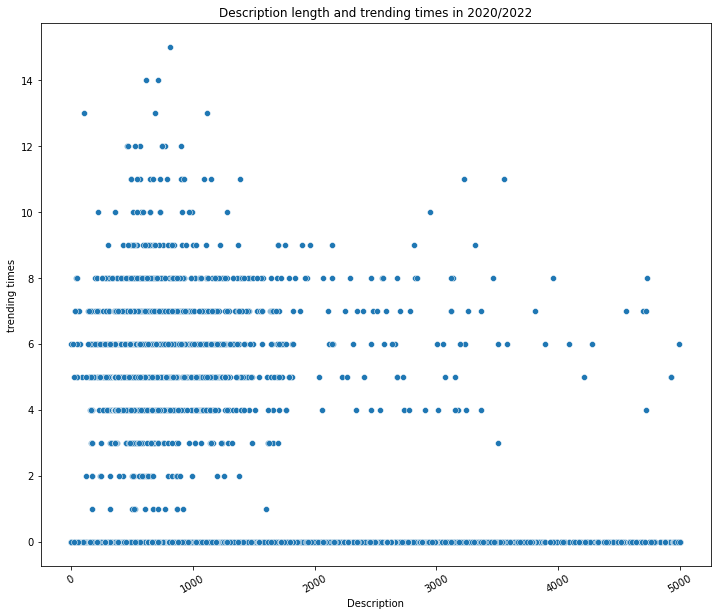

In [78]:
# description length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Description length and trending times in 2020/2022')
desc_length = data20_22['Description'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data20_22, x=desc_length, y='trending times')

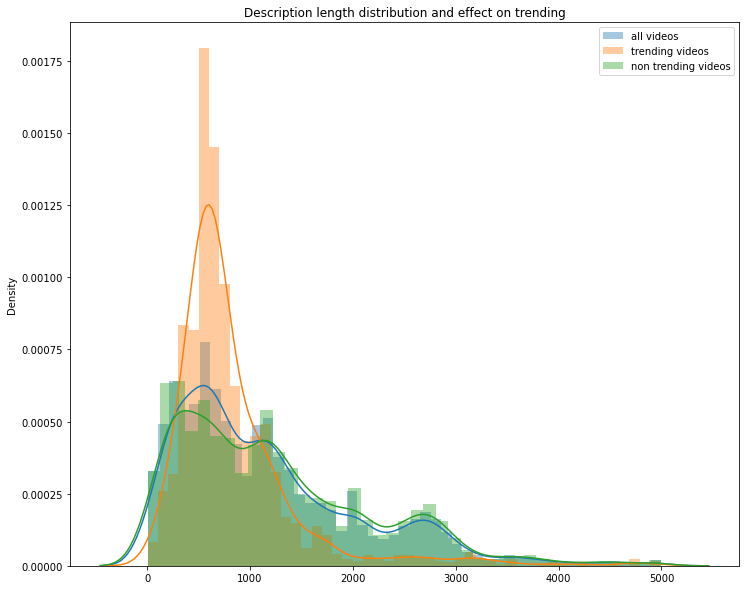

In [79]:
# Description length distribution and effect on trending
figure = plt.figure(figsize=(12,10))
sns.distplot(x=desc_length, label='all videos')
sns.distplot(x=desc_length[data20_22['trending times']>0], label='trending videos')
sns.distplot(x=desc_length[data20_22['trending times']==0], label='non trending videos')

plt.title('Description length distribution and effect on trending')
plt.legend()

In [80]:
# percentage of videos' description with 100 and 1500 characters
desc_length[(desc_length>100)*(desc_length<1500)].count() / desc_length.count() * 100

68.65793780687397

In [81]:
# percentage of trending videos' description with 200 and 1000 characters
desc_length_trending = desc_length[data20_22['trending times']>0]
desc_length_trending[(desc_length_trending >= 200)*(desc_length_trending < 1000)].count() / desc_length_trending.count() * 100

72.24880382775119

In [82]:
# percentage of non trending videos' description with 200 and 1000 characters
desc_length_non_trending = desc_length[data20_22['trending times']==0]
desc_length_non_trending[(desc_length_non_trending >= 200)*(desc_length_non_trending < 1000)].count() / desc_length_non_trending.count() * 100

38.71970834226893

In [83]:
desc_words = pd.Series((data20_22[data20_22['trending times']>0]['Description'].apply(lambda x : str(x).split(' '))).sum())

In [84]:
# word frequency in description

print('Frequent words in description :')
desc_words_tok = pd.Series([word for word in desc_words if not word.lower() in final_stopwords_list])
desc_words_tok.value_counts()[:20]

Frequent words in description :


:              13258
!               1813
                1506
vidéo           1275
-                956
chaîne           696
Twitch           554
/                546
Instagram        518
►                506
Twitter          476
&                475
cette            448
ici              441
boutique         382
Logitech         376
production       354
rater            342
plus             320
commentaire      294
dtype: int64

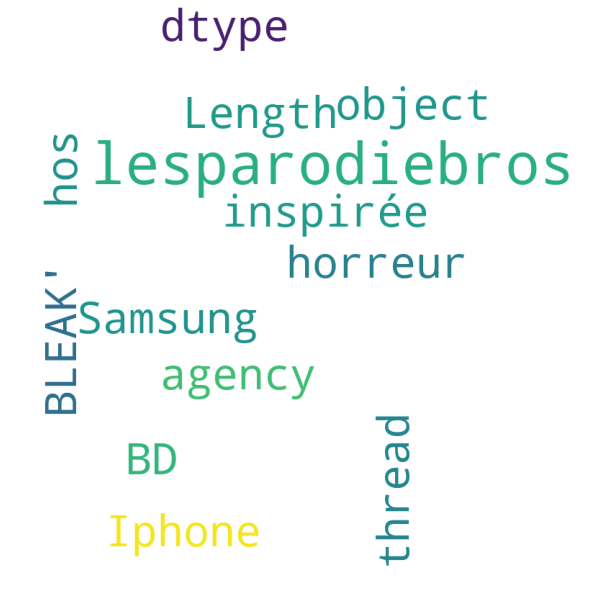

In [85]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(desc_words_tok) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [86]:
# Hashtags 
def hachtag(ch):
    if ch.startswith('#'):
        return(ch )
    else:
        return (None)
    
desc_word = pd.Series(data20_22['Description'].apply(lambda x : str(x).split(' ')).sum())

In [87]:
hachtags = desc_word.apply(lambda x : hachtag(x))

In [88]:
# getting all hashtags
all_hachtag = hachtags[hachtags.notnull()]

In [89]:
# word frequency in hachtags of description

print('Frequent words in hachtags of description :')
all_hachtag.value_counts()[:20]

Frequent words in hachtags of description :


#машаимедведь           273
#мультик                266
#GuillaumePley          255
#JimmyLabeeu            245
#AllezParis             227
#comptine               133
#littleangelfrancais    123
#PSG                    116
#LATELIERDEROXANE       112
#AstucesDuPanda         105
#Staysafe               104
#прямойэфир              95
#live\n\n🎬               94
#Disney                  91
#PrimeStudentetLeQG      89
#weareparis\n👉           88
#PrimeStudentMood        87
#LIFESTYLE               80
#comptines               79
#bébélouis\n\n(🔔)        65
dtype: int64

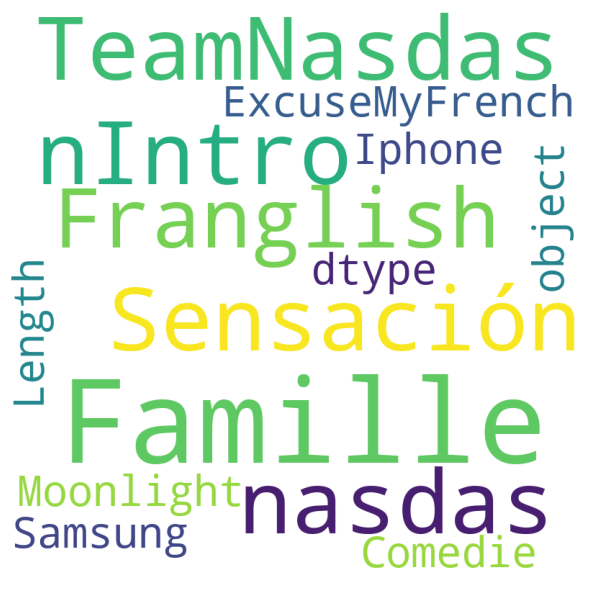

In [90]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(all_hachtag) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [91]:
# hachtag words in trending videos 
desc_word_trend = pd.Series(data20_22[data20_22['trending times']>0]['Description'].apply(lambda x : str(x).split(' ')).sum())
hachtags_trend = desc_word_trend.apply(lambda x : hachtag(x))
all_hachtag_trend = hachtags_trend[hachtags_trend.notnull()]

In [92]:
# word frequency in hachtags of description

print('Frequent words in hachtags of description :')
all_hachtag_trend.value_counts()[:20]

Frequent words in hachtags of description :


#LATELIERDEROXANE      31
#GuillaumePley         17
#JimmyLabeeu           16
#Pbros                 16
#TheParodieBrosShow    15
#LIFESTYLE             10
#ENJOYPHOENIX           9
#LolywoodNight          8
#2                      7
#Lolywood               6
#Albumgratuitvol6       6
#Soolking               6
#BebetoChallenge        5
#24H                    5
#McDo                   5
#Bandeorganisée         5
#25juin                 4
#VS                     4
#Bebeto                 4
#Disney                 4
dtype: int64

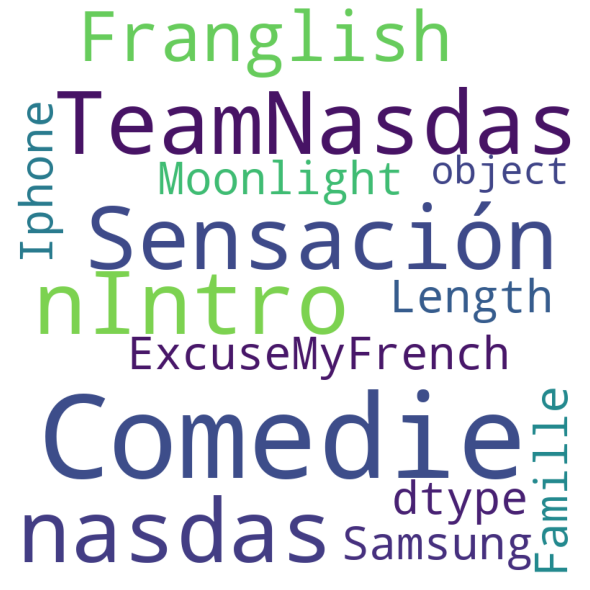

In [93]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(str(all_hachtag_trend) )
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


## Video length effect

In [94]:
def format_time (x):
    if pd.isnull(x):
        return 0
    if (len(str(x).split(":"))==3):
        return (int(str(x).split(":")[0])*60+ int(str(x).split(":")[1]))
    elif (len(str(x).split(":"))==1):
        return(int(str(x).split(":")[0])*1/60)
    else :
        return (int(str(x).split(":")[0])+ int(str(x).split(":")[1])*1/60)

In [95]:
data20_22['Duration_min'] = data20_22['Duration'].apply(lambda x : format_time (x))

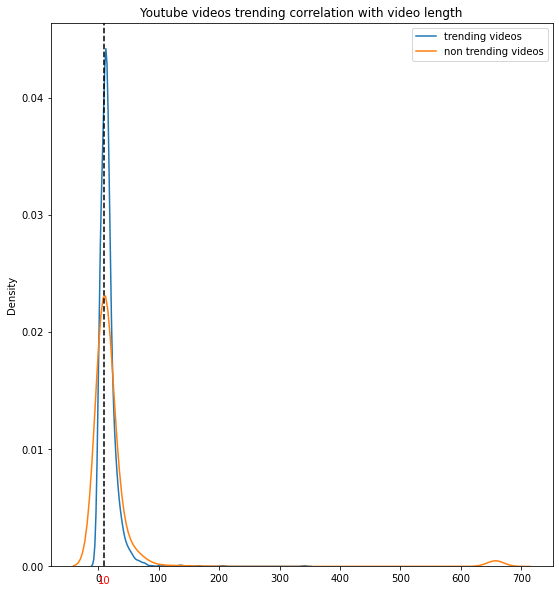

In [96]:
# youtube videos trending correlation with video length in 2020/2022
figure = plt.figure(figsize=(9,10))
#colors = sns.color_palette('pastel')[0:15]

trending20_22 = data20_22[data20_22['trending times']>0]
non_trending20_22 = data20_22[data20_22['trending times']==0]

sns.distplot(x=trending20_22['Duration_min'], hist=False, label='trending videos')
sns.distplot(x=non_trending20_22['Duration_min'], hist=False, label='non trending videos')
plt.axvline(x=10,color='black', linestyle='--')
plt.text(10, -.0008, '10', color='red', ha='center', va='top')

#sns.lineplot(x='Duration_min', y='trending times', data=non_trending20_22, label='non trending videos')
plt.title('Youtube videos trending correlation with video length')
plt.legend()
plt.show()

In [97]:
# percentage of trending videos' duration between 10 and 15 minutes
trending20_22[(trending20_22['Duration_min'] >= 10)*(trending20_22['Duration_min'] < 15)]['Duration_min'].count() / trending20_22['Duration_min'].count() * 100

26.255980861244023

## Video Day of publish effect

In [98]:
import datetime
def get_day_week(date):
    if pd.isnull(date):
        return None
    else:
        date = date.split(' ')[0]
        year, month, day = (int(x) for x in date.split('-'))    
        ans = datetime.date(year, month, day)
        return(ans.strftime("%A"))

In [99]:
data20_22['Day of Publish'] = data20_22['Publish time'].apply(lambda x : get_day_week(x))

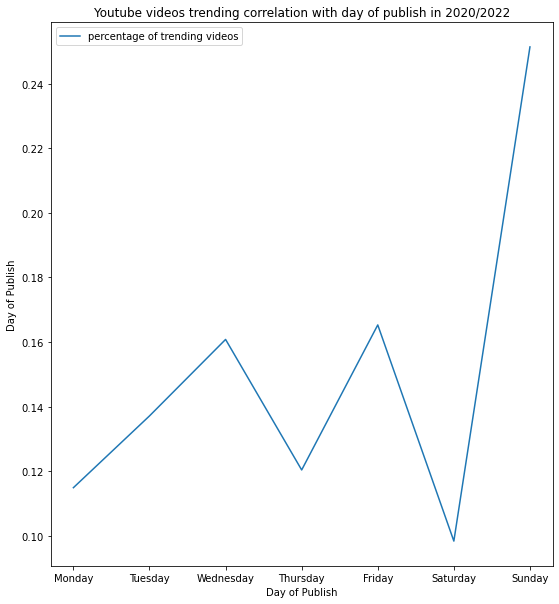

In [100]:
# youtube videos trending correlation with video day of publish in 2020/2022

#mapping days of the week with their position
DaysOfTheWeek = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

figure = plt.figure(figsize=(9,10))
#colors = sns.color_palette('pastel')[0:15]

trending20_22 = data20_22[data20_22['trending times']>0]

percentage = pd.DataFrame(trending20_22.groupby(by=['Day of Publish'])['Day of Publish'].count()/data20_22.groupby(by=['Day of Publish'])['Day of Publish'].count())
percentage['mapped_index'] = list(percentage.index.map(lambda x: DaysOfTheWeek[x]))
percentage = percentage.sort_values(by=['mapped_index'])

sns.lineplot(x=percentage.index, y=percentage['Day of Publish'], label='percentage of trending videos')

plt.title('Youtube videos trending correlation with day of publish in 2020/2022')
plt.legend(loc = 'upper left')
plt.show()

In [101]:
# percentage of trending videos' day of publish in the weekend
percentage['mapped_index'][(percentage['mapped_index'] >=4)*(percentage['mapped_index'] <=6)].count() / percentage['mapped_index'].count() * 100

42.857142857142854

## Video Time of publish effect 

In [102]:
data20_22['hour of Publish'] = data20_22['Publish time'].apply(lambda x : x.split(' ')[1].split(':')[0])

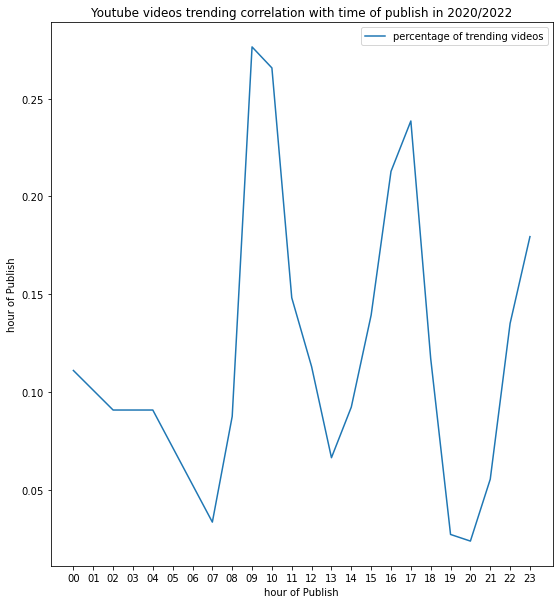

In [103]:
# youtube videos trending correlation with time of publish in 2020/2022
figure = plt.figure(figsize=(9,10))
#colors = sns.color_palette('pastel')[0:15]

trending20_22 = data20_22[data20_22['trending times']>0]

percentage_h = trending20_22.groupby(by=['hour of Publish'])['hour of Publish'].count()/data20_22.groupby(by=['hour of Publish'])['hour of Publish'].count()
percentage_h = percentage_h.sort_index()

sns.lineplot(x=percentage_h.index, y=percentage_h, label='percentage of trending videos')

plt.title('Youtube videos trending correlation with time of publish in 2020/2022')
plt.legend(loc = 'upper right')
plt.show()

## Pencentage of categories that trend most out of categories published

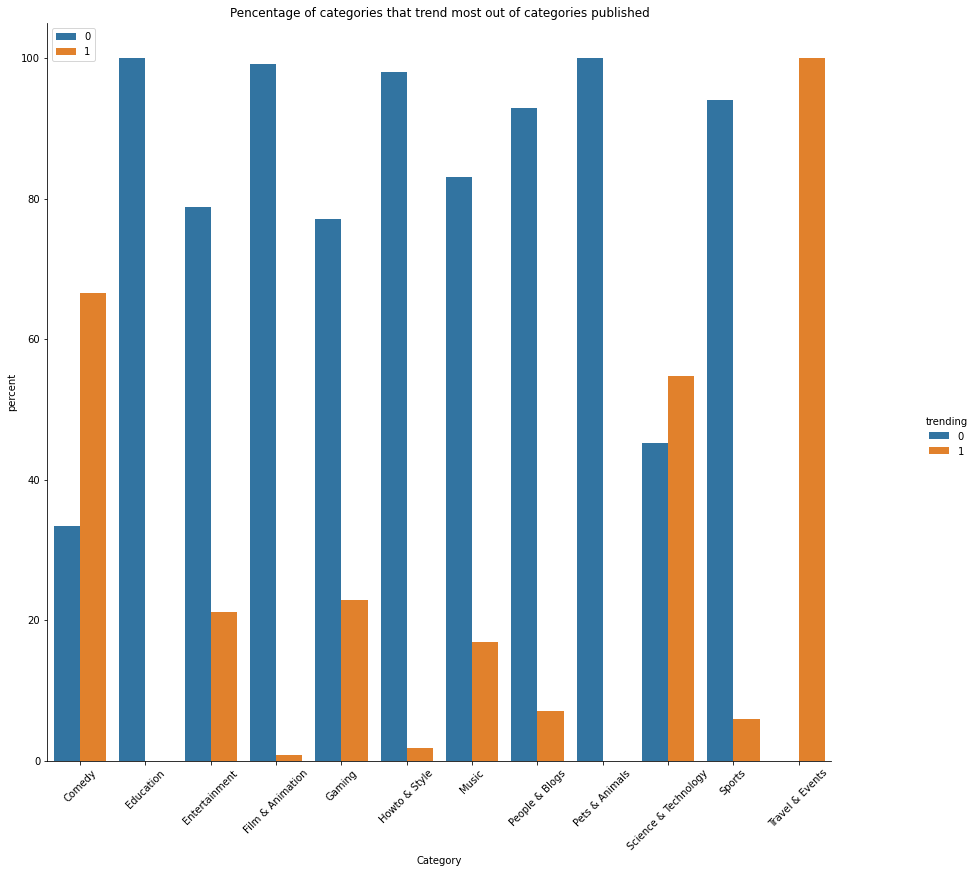

In [104]:
# Pencentage of categories that trend most out of categories published
data20_22['trending'] = (data20_22['trending times']>0).apply(lambda x: int(x))

g = data20_22.groupby(by=['Category'])['trending'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='Category',y='percent',hue='trending',kind='bar')

g.fig.set_figwidth(15)
g.fig.set_figheight(12)

plt.title('Pencentage of categories that trend most out of categories published')
plt.xticks(rotation=45)
plt.legend()

# Trendings propagation

In [105]:
data20_22['Publish time'] = pd.to_datetime(data20_22['Publish time'].astype(str), format='%Y/%m/%d')
data17_18['Publish time'] = pd.to_datetime(data17_18['Publish time'].astype(str), format='%Y/%m/%d')
trending20_22 = data20_22[data20_22['trending times']>0].sort_values(by=['Publish time'])
trending17_18 = data17_18[data17_18['trending times']>0].sort_values(by=['Publish time'])
# adding a date column
trending20_22['Publish date'] = trending20_22['Publish time'].apply(lambda x : str(x).split(' ')[0])
trending17_18['Publish date'] = trending17_18['Publish time'].apply(lambda x : str(x).split(' ')[0])

In [106]:
##### Hashtags
hashtag_vid_trend = trending20_22['Description'].apply(lambda x : [hachtag(j) for j in str(x).split(' ')])
# remove none elements
hashtag_vid_trend = hashtag_vid_trend.apply(lambda x : list(filter(None, x)))

In [107]:
# calculate similarity between hashtags using sort data by date
import difflib

ratio_prop = []
for i, list_hash in enumerate(hashtag_vid_trend.iloc[:-1]):
    if list_hash == []:
        ratio_prop.append(0)
    else:
        sm=difflib.SequenceMatcher(None,hashtag_vid_trend.iloc[i],hashtag_vid_trend.iloc[i+1])
        ratio_prop.append(sm.ratio())   

In [108]:
hash_sim_ratio = pd.Series(ratio_prop)
hash_sim_idx = hash_sim_ratio[hash_sim_ratio>0].index
trending20_22.iloc[hash_sim_idx]
print(hashtag_vid_trend.iloc[hash_sim_idx])

3534         [#Albumgratuitvol6, #Carrédas]
3530              [#Albumgratuitvol6, #Moi]
3525      [#Albumgratuitvol6, #Ovniprésent]
3527           [#Albumgratuitvol6, #Bandit]
6299    [#Hugoposay, #FastGoodCuisine\n\n↓]
2715                           [#PSGxMESSI]
3511            [#Larecette, #Independance]
Name: Description, dtype: object


In [109]:
###### Tags
tag_vid_trend = trending20_22['Tags'].apply(lambda x : literal_eval(str(x)))

In [110]:
# calculate similarity between tags using sort data by date
import difflib

ratio_prop = []
for i, list_hash in enumerate(tag_vid_trend.iloc[:-1]):
    if list_hash == []:
        ratio_prop.append(0)
    else:
        sm=difflib.SequenceMatcher(None,tag_vid_trend.iloc[i],tag_vid_trend.iloc[i+1])
        ratio_prop.append(sm.ratio())   

<AxesSubplot:title={'center':'Propagation of trends in categories'}, xlabel='Category', ylabel='count'>

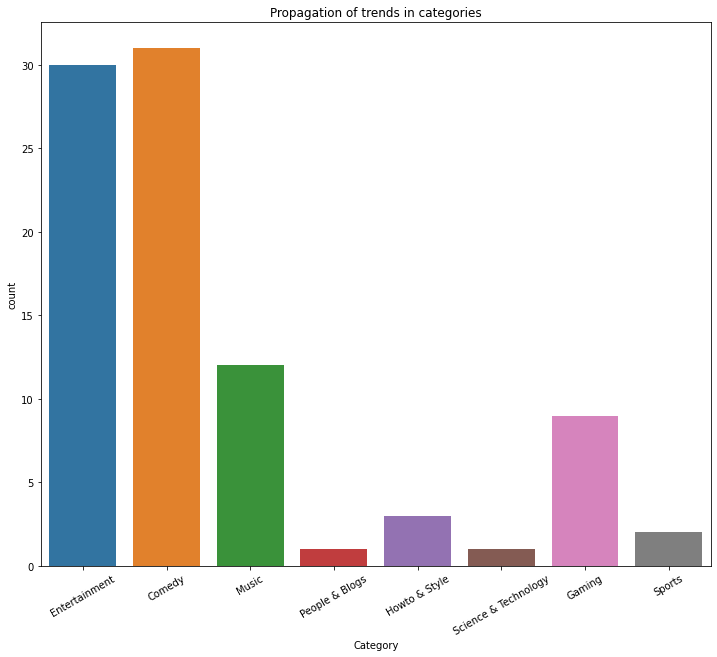

In [111]:
# Propagation of trends in categories
tag_sim_ratio = pd.Series(ratio_prop)
tag_sim_idx = hash_sim_ratio[tag_sim_ratio>0].index
tag_sim = trending20_22.iloc[tag_sim_idx]
figure = plt.figure(figsize=(12,10))
plt.xticks(rotation=30)
plt.title ('Propagation of trends in categories')
sns.countplot(x='Category', data=trending20_22.iloc[tag_sim_idx])

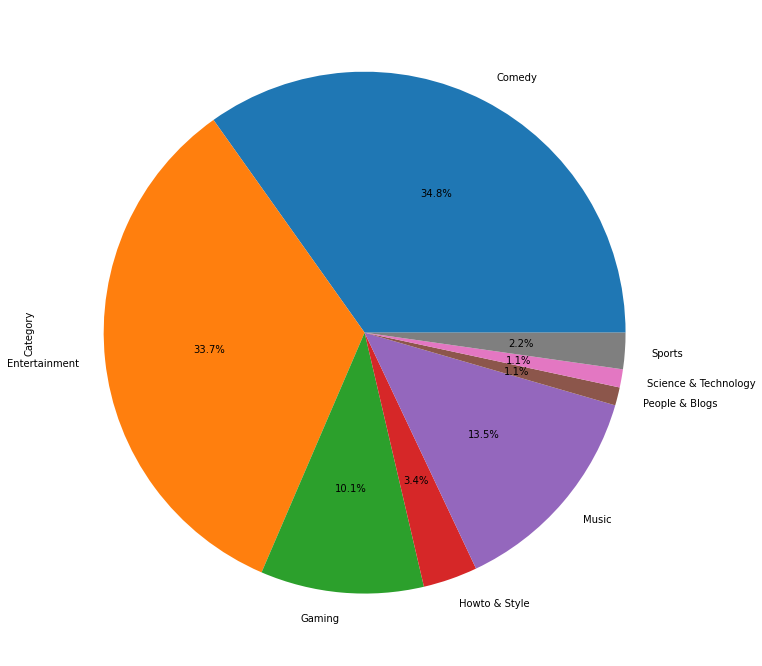

In [112]:
# Pie chart of propagation of trends in categories
figure = plt.figure(figsize=(14,12))
tag_sim.groupby("Category")['Category'].count().plot.pie(autopct='%.1f%%')
plt.show()

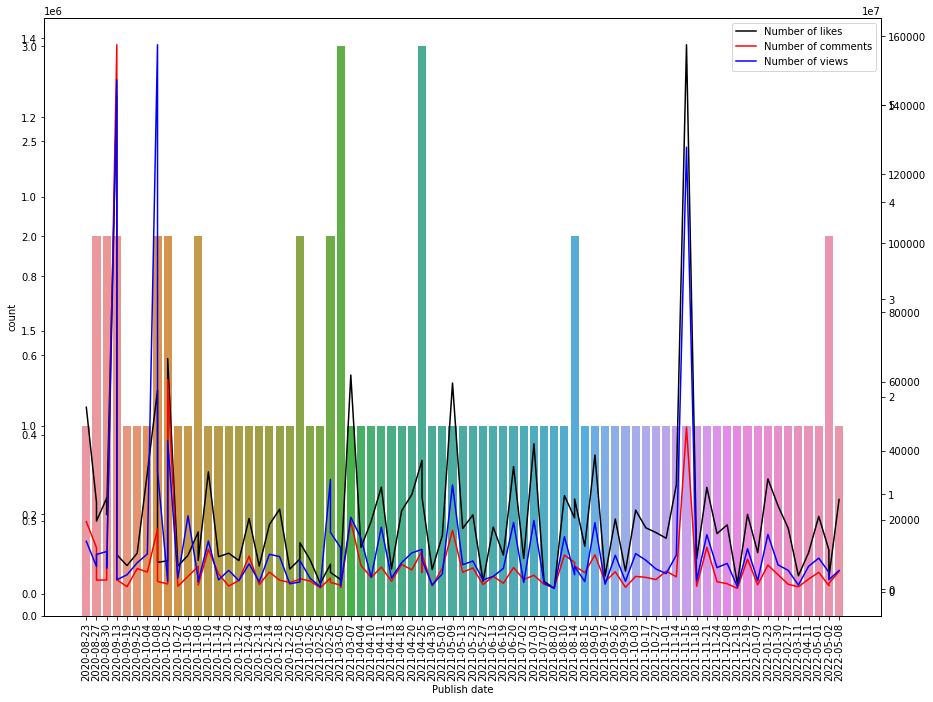

In [113]:
# Propagation of trends in correlation propagation of likes, comments and views

lines = []
figur, ax1 = plt.subplots(figsize=(15,11))
plt.xticks(rotation=90)
sns.countplot(x='Publish date', data=trending20_22.iloc[tag_sim_idx])
#ax1.plot(t, data1, color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#line[0] = ax2.plot(trending20_22.iloc[tag_sim_idx]['Publish date'],
#         trending20_22.iloc[tag_sim_idx]['Number of likes'].reset_index(drop=True), color='black', label='Number of likes')
line = ax2.plot(trending20_22.iloc[tag_sim_idx]['Publish date'],
         trending20_22.iloc[tag_sim_idx]['Number of likes'].reset_index(drop=True), color='black', label='Number of likes')
lines.append(line[0])
ax3 = ax2.twinx()
line = ax3.plot(trending20_22.iloc[tag_sim_idx]['Publish date'], 
         trending20_22.iloc[tag_sim_idx]['Number of comments'].reset_index(drop=True), color='red', label='Number of comments')
lines.append(line[0])
ax4 = ax2.twinx()
line = ax4.plot(trending20_22.iloc[tag_sim_idx]['Publish date'], 
         trending20_22.iloc[tag_sim_idx]['Number of views'].reset_index(drop=True), color='blue', label='Number of views')
lines.append(line[0])
plt.legend(iter(lines), ('Number of likes','Number of comments','Number of views'))

## Trending and categories

In [114]:
trending20_22.groupby("Category")['Number of likes'].count().sort_values()

Category
Travel & Events           1
Film & Animation          9
People & Blogs           14
Science & Technology     52
Howto & Style            53
Sports                   64
Gaming                  159
Music                   182
Comedy                  495
Entertainment           643
Name: Number of likes, dtype: int64

In [115]:
trending17_18.groupby("Category")['Number of likes'].count().sort_values()

Category
Film & Animation          1
Gaming                   12
Science & Technology     40
Music                    45
People & Blogs           75
Sports                   81
Entertainment           141
Howto & Style           181
Comedy                  203
Name: Number of likes, dtype: int64

In [116]:
trending20_22.groupby("Category")['Number of comments'].count().sort_values()

Category
Travel & Events           1
Film & Animation          9
People & Blogs           14
Science & Technology     52
Howto & Style            53
Sports                   64
Gaming                  159
Music                   182
Comedy                  495
Entertainment           643
Name: Number of comments, dtype: int64

In [117]:
trending17_18.groupby("Category")['Number of comments'].count().sort_values()

Category
Film & Animation          1
Gaming                   12
Science & Technology     40
Music                    45
People & Blogs           75
Sports                   81
Entertainment           141
Howto & Style           181
Comedy                  203
Name: Number of comments, dtype: int64